# Exploring Visualization
There are several different libraries that are available for data visualization. Create some visualizations using the Pumpkin data in this lesson with matplotlib and seaborn in a sample notebook. Which libraries are easier to work with?

In The previous assignment, we explored visualization, when and how to visualize on different data for different Purpose.
1. Visualizing Distribution
2. Visualizing Quantiles
3. Visualizing Proportions

### Types of plots
1. Line Plot: 
2. Bar chat:
3. Histogram
4. Boxplots
5. Piechats
6. waffle chat
7. scatter plot
8. count plot
   

Using The Pumkin dataset, we will explore some of the types 

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DatetimeIndex

In [17]:
pumkins = pd.read_csv('US-pumpkins.csv')
pumkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [18]:
print(pumkins.isnull().sum())

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64


In [19]:
Month = DatetimeIndex(pumkins['Date']).month
Price =(pumkins['Low Price'] + pumkins['High Price'])/ 2


In [20]:
pumpkin_dict = {'City Name': pumkins['City Name'], 
                'Package': pumkins['Package'],
                'Variety': pumkins['Variety'],
                'Month': Month,
                'High Price': pumkins['High Price'],
                'Low Price': pumkins['Low Price'],  
                'Average Price': Price,
                'Origin': pumkins['Origin']}

In [21]:
new_pumkins = pd.DataFrame(pumpkin_dict)
new_pumkins

,City Name,Package,Variety,Month,High Price,Low Price,Average Price,Origin
0,BALTIMORE,24 inch bins,NaN,4,280.00,270.00,275.00,MARYLAND
1,BALTIMORE,24 inch bins,NaN,5,280.00,270.00,275.00,MARYLAND
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9,160.00,160.00,160.00,DELAWARE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9,160.00,160.00,160.00,VIRGINIA
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11,100.00,90.00,95.00,MARYLAND
...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,MINIATURE,9,14.75,14.75,14.75,ILLINOIS
1753,ST. LOUIS,36 inch bins,MINIATURE,9,275.00,275.00,275.00,MICHIGAN
1754,ST. LOUIS,36 inch bins,MINIATURE,9,275.00,275.00,275.00,MICHIGAN
1755,ST. LOUIS,36 inch bins,MINIATURE,9,275.00,275.00,275.00,MICHIGAN


In [ ]:
# Calculate price per inch for 24 inch bins
mask_24 = new_pumkins['Package'].str.contains('24 inch')
new_pumkins.loc[mask_24, 'Price per inch'] = new_pumkins.loc[mask_24, 'Average Price'] / 24

# Calculate price per inch for 36 inch bins
mask_36 = new_pumkins['Package'].str.contains('36 inch')
new_pumkins.loc[mask_36, 'Price per inch'] = new_pumkins.loc[mask_36, 'Average Price'] / 36

# Display the updated dataframe for these packages
new_pumkins[new_pumkins['Package'].str.contains('24 inch|36 inch')][['Package', 'Average Price', 'Price per inch']]

In [ ]:
#lets convert the all the packgae in inch to 1 inches and convert the price to 1 inch using the .str.contains function
new_pumkins.loc[new_pumkins['Package'].str.contains('24 inch'), 'Price'] = new_pumkins['Average Price' ]/ 24
new_pumkins.loc[new_pumkins['Package'].str.contains('36 inch'), 'Price'] = new_pumkins['Average Price'] / 36

new_pumkins.head()

,City Name,Package,Variety,Month,High Price,Low Price,Average Price,Origin,Price
0,BALTIMORE,24 inch bins,NaN,4,280.0,270.0,275.0,MARYLAND,11.458333
1,BALTIMORE,24 inch bins,NaN,5,280.0,270.0,275.0,MARYLAND,11.458333
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9,160.0,160.0,160.0,DELAWARE,6.666667
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9,160.0,160.0,160.0,VIRGINIA,6.666667
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11,100.0,90.0,95.0,MARYLAND,3.958333


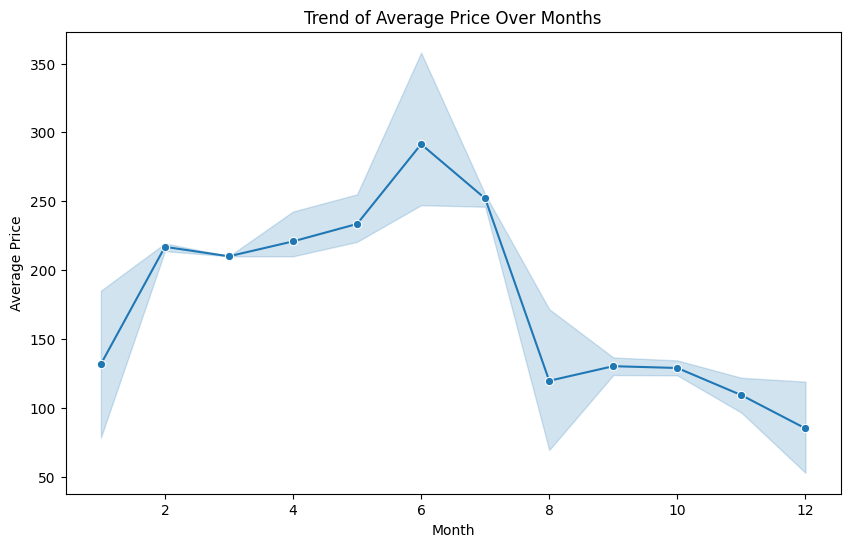

In [26]:
#line chart showing the trend of average price over months
plt.figure(figsize=(10,6))
plt.title('Trend of Average Price Over Months')
sns.lineplot(data=new_pumkins, x='Month', y='Average Price', marker='o')
# plt.xticks(range(1, 13))    
plt.show()

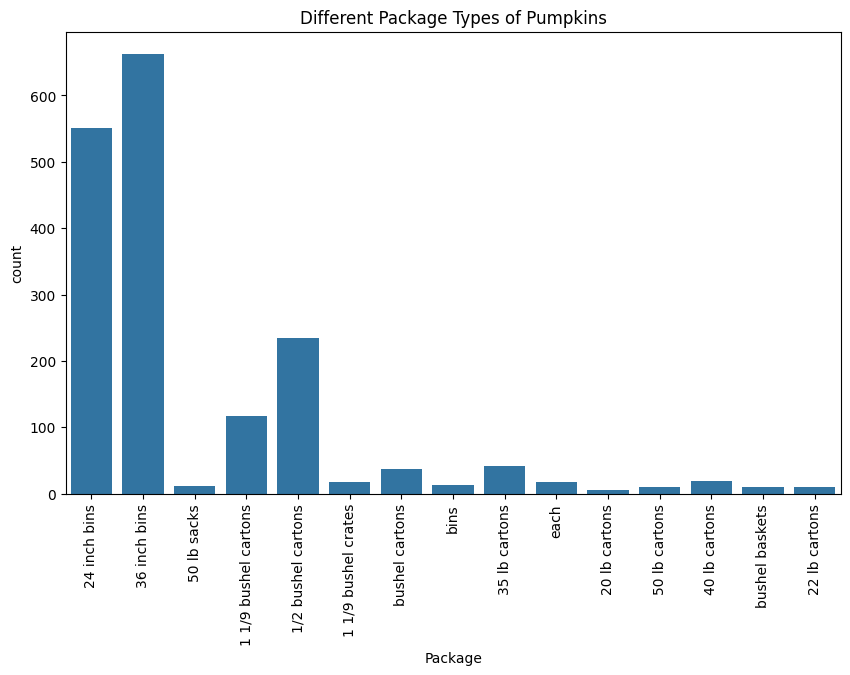

In [31]:
#bar chart showing the different package types
plt.figure(figsize=(10,6))
plt.title('Different Package Types of Pumpkins')
sns.countplot(data=new_pumkins, x='Package')
plt.xticks(rotation=90)
plt.show()

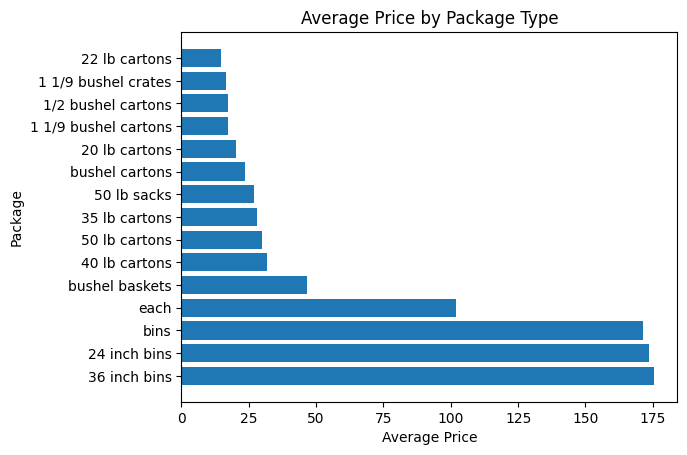

In [36]:
#lets check which packgafe has the higest price by grouping the package and average price
plt.barh(new_pumkins.groupby('Package')['Average Price'].mean().sort_values(ascending=False).index,
         new_pumkins.groupby('Package')['Average Price'].mean().sort_values(ascending=False))
plt.xlabel('Average Price') 
plt.ylabel('Package')
plt.title('Average Price by Package Type')
plt.show()

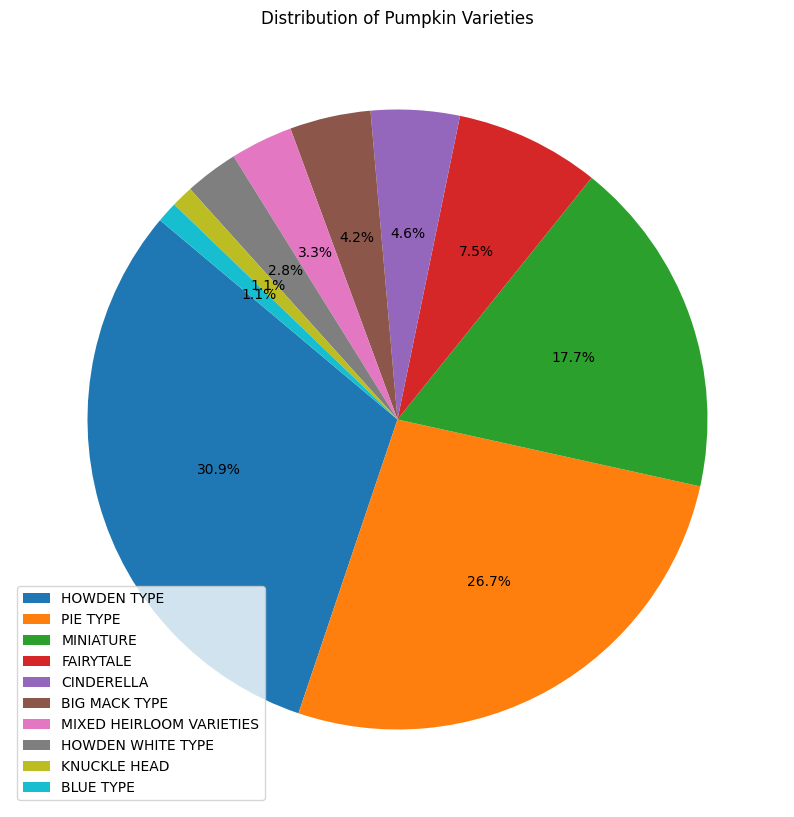

In [ ]:
#lets plot pie chart using sns of the different variety of pumpkins
variety_counts = new_pumkins['Variety'].value_counts()
plt.figure(figsize=(10,12))
plt.pie(variety_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pumpkin Varieties')
plt.legend(variety_counts.index, loc='best')
plt.show()

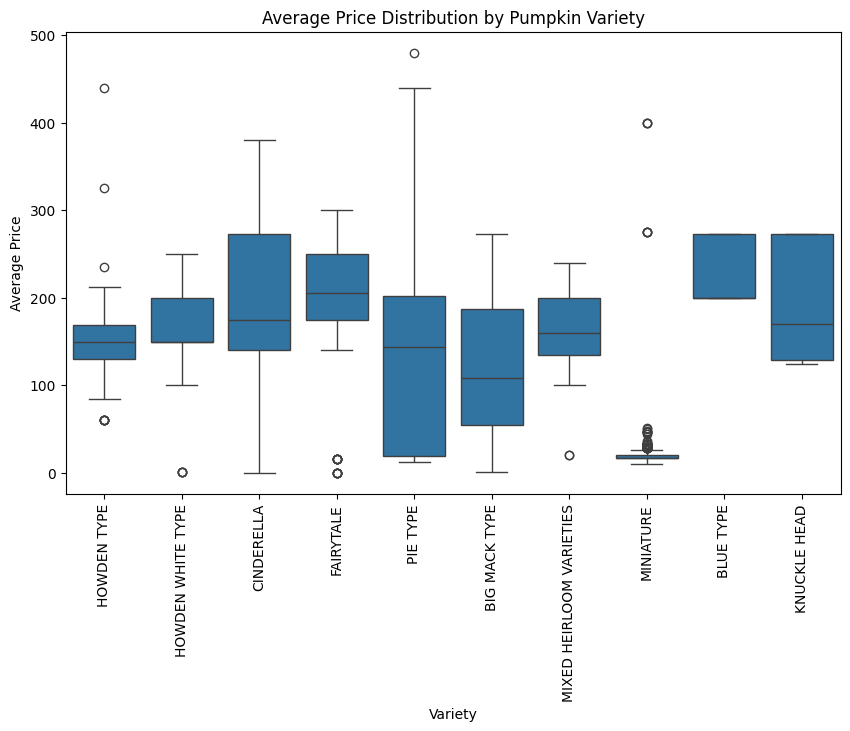

In [46]:
#lets visualize the variety of pupkin that is the cheapest and the most expensive
plt.figure(figsize=(10,6))
sns.boxplot(data=new_pumkins, x='Variety', y='Average Price')
plt.xticks(rotation=90) 
plt.title('Average Price Distribution by Pumpkin Variety')
plt.show()
